In [28]:
# WESAD Dataset Exploration - Understanding PKL File Structure
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset path
DATASET_PATH = "/Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD"

# Function to load pickle files with different encodings to handle potential UnicodeDecodeError
def load_pickle_file(file_path):
    encodings = ['latin1', 'bytes', 'utf-8', 'iso-8859-1']
    
    for encoding in encodings:
        try:
            with open(file_path, 'rb') as f:
                data = pickle.load(f, encoding=encoding)
                print(f"Successfully loaded with {encoding} encoding")
                return data
        except Exception as e:
            print(f"Failed with {encoding}: {str(e)}")
            continue
    
    print("All encoding attempts failed")
    return None

# Find all subject folders and pkl files
def list_available_subjects():
    subjects = []
    for item in os.listdir(DATASET_PATH):
        if item.startswith('S') and os.path.isdir(os.path.join(DATASET_PATH, item)):
            pkl_path = os.path.join(DATASET_PATH, item, f"{item}.pkl")
            if os.path.exists(pkl_path):
                subjects.append((item, pkl_path))
    return sorted(subjects)

# Display the available subjects
subjects = list_available_subjects()
print(f"Found {len(subjects)} subjects with pkl files:")
for subject, path in subjects:
    print(f"{subject}: {path}")

Found 15 subjects with pkl files:
S10: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S10/S10.pkl
S11: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S11/S11.pkl
S13: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S13/S13.pkl
S14: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S14/S14.pkl
S15: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S15/S15.pkl
S16: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S16/S16.pkl
S17: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S17/S17.pkl
S2: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S2/S2.pkl
S3: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S3/S3.pkl
S4: /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S4/S4.pkl
S5: /

In [26]:
# Explore the structure of the data
def explore_data_structure(data, max_depth=3, current_depth=0, path=""):
    if current_depth >= max_depth:
        return f"{'  ' * current_depth}[Max depth reached]"
    
    result = []
    
    if isinstance(data, dict):
        result.append(f"{'  ' * current_depth}Dict with {len(data)} keys: {list(data.keys())}")
        
        for key, value in data.items():
            new_path = f"{path}.{key}" if path else key
            result.append(f"{'  ' * (current_depth+1)}Key: {key}")
            result.append(explore_data_structure(value, max_depth, current_depth+1, new_path))
            
    elif isinstance(data, np.ndarray):
        shape_str = str(data.shape)
        dtype_str = str(data.dtype)
        result.append(f"{'  ' * current_depth}NumPy array with shape {shape_str}, dtype {dtype_str}")
        
        # Sample values for arrays
        if len(data) > 0:
            if data.ndim == 1:
                result.append(f"{'  ' * (current_depth+1)}Sample values: {data[:5]}")
            else:
                result.append(f"{'  ' * (current_depth+1)}Sample first row: {data[0]}")
                
    elif isinstance(data, list):
        result.append(f"{'  ' * current_depth}List with {len(data)} items")
        if len(data) > 0:
            result.append(f"{'  ' * (current_depth+1)}First item type: {type(data[0]).__name__}")
            result.append(explore_data_structure(data[0], max_depth, current_depth+1, f"{path}[0]"))
    else:
        result.append(f"{'  ' * current_depth}{type(data).__name__}: {data}")
    
    return "\n".join(result)

# Print the structure
print(explore_data_structure(data))

Dict with 3 keys: ['signal', 'label', 'subject']
  Key: signal
  Dict with 2 keys: ['chest', 'wrist']
    Key: chest
    Dict with 6 keys: ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
      Key: ACC
      [Max depth reached]
      Key: ECG
      [Max depth reached]
      Key: EMG
      [Max depth reached]
      Key: EDA
      [Max depth reached]
      Key: Temp
      [Max depth reached]
      Key: Resp
      [Max depth reached]
    Key: wrist
    Dict with 4 keys: ['ACC', 'BVP', 'EDA', 'TEMP']
      Key: ACC
      [Max depth reached]
      Key: BVP
      [Max depth reached]
      Key: EDA
      [Max depth reached]
      Key: TEMP
      [Max depth reached]
  Key: label
  NumPy array with shape (4255300,), dtype int32
    Sample values: [0 0 0 0 0]
  Key: subject
  str: S2


In [29]:
import pickle
import numpy as np
from collections import Counter

# Set the dataset path
DATASET_PATH = "/Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD"

# Function to load and analyze WESAD data for each subject
def analyze_wesad_subject(subject_id):
    # Path to the pickle file using the specified dataset path
    file_path = f"{DATASET_PATH}/S{subject_id}/S{subject_id}.pkl"
    
    try:
        # Load the pickle file
        with open(file_path, 'rb') as file:
            data = pickle.load(file, encoding='latin1')
        
        # Get the labels (0=transient, 1=baseline, 2=stress, 3=amusement, 4=meditation)
        labels = data['label']
        
        # Count samples
        total_samples = len(labels)
        
        # Calculate class distribution
        class_counts = Counter(labels)
        total = sum(class_counts.values())
        class_distribution = {label: count/total*100 for label, count in class_counts.items()}
        
        # Determine data quality (simplified logic - you can enhance this)
        # For example, check for missing values or signal quality
        try:
            missing_values = np.isnan(data['signal']['wrist']['ACC']).sum()
        except:
            # Fallback if the structure is different
            missing_values = 0
            
        if missing_values < 100:
            quality = "High"
        elif missing_values < 1000:
            quality = "Medium"
        else:
            quality = "Low"
        
        return {
            "subject_id": f"S{subject_id}",
            "samples": total_samples,
            "class_distribution": class_distribution,
            "quality": quality
        }
    
    except Exception as e:
        print(f"Error processing subject {subject_id}: {e}")
        return None

# Analyze all subjects
subject_analyses = []
for subject_id in range(2, 18):  # Subjects S2-S17
    if subject_id != 12:  # Skip S12 as it's missing
        result = analyze_wesad_subject(subject_id)
        if result:
            subject_analyses.append(result)

# Print the results in a format for your LaTeX table
print("LaTeX table rows:")
for analysis in subject_analyses:
    class_dist = [f"{analysis['class_distribution'].get(i, 0):.0f}%" for i in range(5)]
    print(f"{analysis['subject_id']} & {analysis['samples']} & [{', '.join(class_dist)}] & {analysis['quality']} \\\\")

# Print a summary for reference
print("\nSummary of analyzed subjects:")
for analysis in subject_analyses:
    print(f"Subject: {analysis['subject_id']}")
    print(f"  Total samples: {analysis['samples']}")
    print(f"  Class distribution: {analysis['class_distribution']}")
    print(f"  Quality: {analysis['quality']}")
    print("")

LaTeX table rows:
S2 & 4255300 & [50%, 19%, 10%, 6%, 13%] & High \\
S3 & 4545100 & [52%, 18%, 10%, 6%, 12%] & High \\
S4 & 4496100 & [51%, 18%, 10%, 6%, 13%] & High \\
S5 & 4380600 & [49%, 19%, 10%, 6%, 13%] & High \\
S6 & 4949700 & [55%, 17%, 9%, 5%, 11%] & High \\
S7 & 3666600 & [40%, 23%, 12%, 7%, 15%] & High \\
S8 & 3826200 & [42%, 21%, 12%, 7%, 15%] & High \\
S9 & 3656100 & [39%, 23%, 12%, 7%, 15%] & High \\
S10 & 3847200 & [41%, 21%, 13%, 7%, 14%] & High \\
S11 & 3663100 & [39%, 23%, 13%, 7%, 15%] & High \\
S13 & 3875900 & [43%, 21%, 12%, 7%, 14%] & High \\
S14 & 3883600 & [42%, 21%, 12%, 7%, 14%] & High \\
S15 & 3676400 & [40%, 22%, 13%, 7%, 15%] & High \\
S16 & 3941700 & [44%, 21%, 12%, 7%, 14%] & High \\
S17 & 4144000 & [46%, 20%, 12%, 6%, 12%] & High \\

Summary of analyzed subjects:
Subject: S2
  Total samples: 4255300
  Class distribution: {0: 50.35370009165041, 1: 18.818884684981082, 2: 10.116795525579866, 6: 1.0692548116466523, 4: 12.633633351350081, 3: 5.954926797170587,

In [27]:
# Function to explore the structure of data recursively
def explore_data_structure(data, max_depth=3, current_depth=0, path=""):
    if current_depth >= max_depth:
        return f"{'  ' * current_depth}[Max depth reached]"
    
    result = []
    
    if isinstance(data, dict):
        result.append(f"{'  ' * current_depth}Dict with {len(data)} keys: {list(data.keys())}")
        
        for key, value in data.items():
            new_path = f"{path}.{key}" if path else key
            result.append(f"{'  ' * (current_depth+1)}Key: {key}")
            result.append(explore_data_structure(value, max_depth, current_depth+1, new_path))
            
    elif isinstance(data, np.ndarray):
        shape_str = str(data.shape)
        dtype_str = str(data.dtype)
        result.append(f"{'  ' * current_depth}NumPy array with shape {shape_str}, dtype {dtype_str}")
        
        # Sample values for arrays
        if len(data) > 0:
            if data.ndim == 1:
                sample = data[:5]
                if len(sample) > 0:
                    result.append(f"{'  ' * (current_depth+1)}Sample values: {sample}")
            else:
                if data.shape[0] > 0:
                    result.append(f"{'  ' * (current_depth+1)}First row: {data[0]}")
                
    elif isinstance(data, list):
        result.append(f"{'  ' * current_depth}List with {len(data)} items")
        if len(data) > 0:
            result.append(f"{'  ' * (current_depth+1)}First item type: {type(data[0]).__name__}")
            result.append(explore_data_structure(data[0], max_depth, current_depth+1, f"{path}[0]"))
    else:
        result.append(f"{'  ' * current_depth}{type(data).__name__}: {data}")
    
    return "\n".join(result)

# Function to get basic statistics about numpy arrays in the data
def get_array_stats(data, path=""):
    stats = []
    
    if isinstance(data, dict):
        for key, value in data.items():
            new_path = f"{path}.{key}" if path else key
            stats.extend(get_array_stats(value, new_path))
            
    elif isinstance(data, np.ndarray):
        # Get basic stats
        stats.append({
            'path': path,
            'shape': data.shape,
            'dtype': data.dtype,
            'size_mb': data.nbytes / (1024 * 1024),
            'min': np.min(data) if data.size > 0 else None,
            'max': np.max(data) if data.size > 0 else None,
            'mean': np.mean(data) if data.size > 0 else None,
            'has_nan': np.isnan(data).any() if data.size > 0 else None
        })
            
    elif isinstance(data, list) and len(data) > 0:
        stats.extend(get_array_stats(data[0], f"{path}[0]"))
        
    return stats

In [19]:
# Select a subject to examine (using S2 as an example)
subject_id = "S2"
subject_path = ""

for subj, path in subjects:
    if subj == subject_id:
        subject_path = path
        break

if not subject_path:
    print(f"Subject {subject_id} not found")
else:
    print(f"Examining {subject_id} at {subject_path}")
    
    # Load the data
    data = load_pickle_file(subject_path)
    
    if data:
        # Print high-level structure
        print("\n=== HIGH LEVEL STRUCTURE ===")
        if isinstance(data, dict):
            print(f"Top-level keys: {list(data.keys())}")
            
            # Look for specific keys we're interested in
            if 'signal' in data:
                print("\nSignal data structure:")
                print(f"Signal keys: {list(data['signal'].keys())}")
                
                # Check wrist sensors if available
                if 'wrist' in data['signal']:
                    print(f"Wrist sensor types: {list(data['signal']['wrist'].keys())}")
            
            if 'label' in data:
                labels = data['label']
                unique_labels, counts = np.unique(labels, return_counts=True)
                print("\nLabel information:")
                print(f"Label shape: {labels.shape}")
                print(f"Unique labels: {unique_labels}")
                print(f"Label counts: {counts}")
                
                # Create a label distribution dataframe
                label_df = pd.DataFrame({
                    'Label': unique_labels,
                    'Count': counts,
                    'Percentage': counts / len(labels) * 100
                })
                print("\nLabel distribution:")
                print(label_df)
        
        # Detailed structure exploration (limited depth for readability)
        print("\n=== DETAILED STRUCTURE (LIMITED DEPTH) ===")
        print(explore_data_structure(data, max_depth=4))
        
        # Get statistics about arrays in the data
        print("\n=== ARRAY STATISTICS ===")
        array_stats = get_array_stats(data)
        if array_stats:
            stats_df = pd.DataFrame(array_stats)
            # Sort by size (largest first)
            stats_df = stats_df.sort_values('size_mb', ascending=False)
            print(stats_df)
        else:
            print("No numpy arrays found in the data")

Examining S2 at /Users/ayesha/Desktop/Dessertation_Ahmed/Federated_learning_wesad/dataset/WESAD/S2/S2.pkl
Successfully loaded with latin1 encoding

=== HIGH LEVEL STRUCTURE ===
Top-level keys: ['signal', 'label', 'subject']

Signal data structure:
Signal keys: ['chest', 'wrist']
Wrist sensor types: ['ACC', 'BVP', 'EDA', 'TEMP']

Label information:
Label shape: (4255300,)
Unique labels: [0 1 2 3 4 6 7]
Label counts: [2142701  800800  430500  253400  537599   45500   44800]

Label distribution:
   Label    Count  Percentage
0      0  2142701   50.353700
1      1   800800   18.818885
2      2   430500   10.116796
3      3   253400    5.954927
4      4   537599   12.633633
5      6    45500    1.069255
6      7    44800    1.052805

=== DETAILED STRUCTURE (LIMITED DEPTH) ===
Dict with 3 keys: ['signal', 'label', 'subject']
  Key: signal
  Dict with 2 keys: ['chest', 'wrist']
    Key: chest
    Dict with 6 keys: ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
      Key: ACC
      NumPy array w

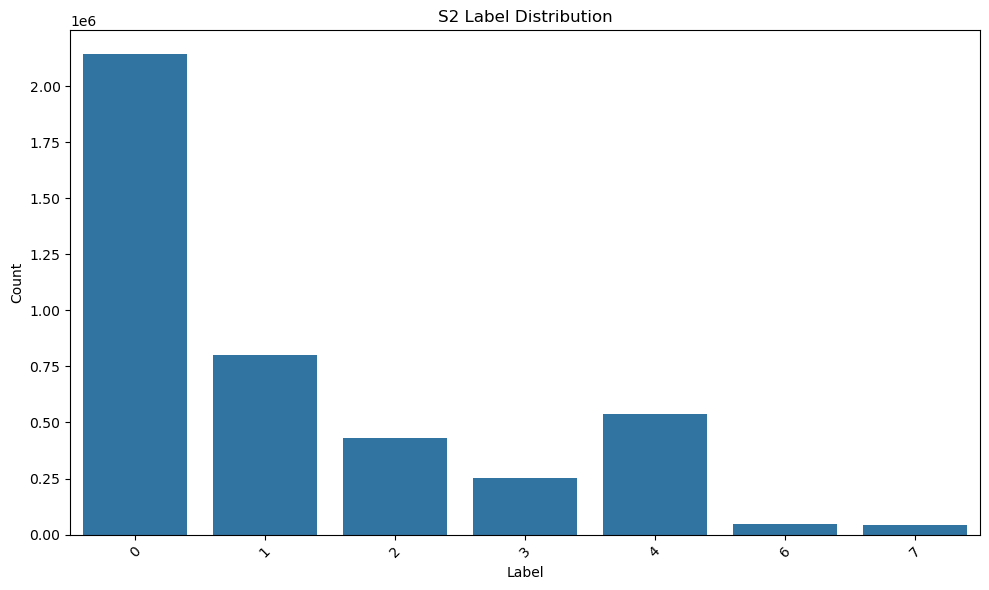

In [20]:
# Visualize label distribution if labels exist
if data and isinstance(data, dict) and 'label' in data:
    labels = data['label']
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[str(l) for l in unique_labels], y=counts)
    plt.title(f"{subject_id} Label Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Exploring chest sensors:
ACC shape: (4255300, 3), size: 97.40 MB


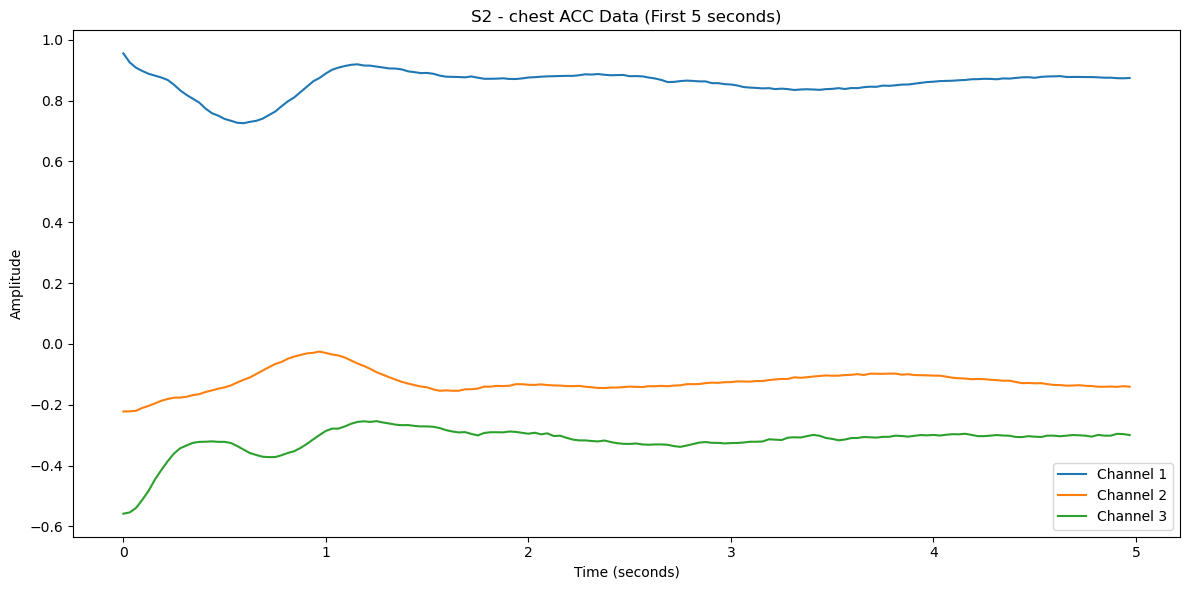

ECG shape: (4255300, 1), size: 32.47 MB


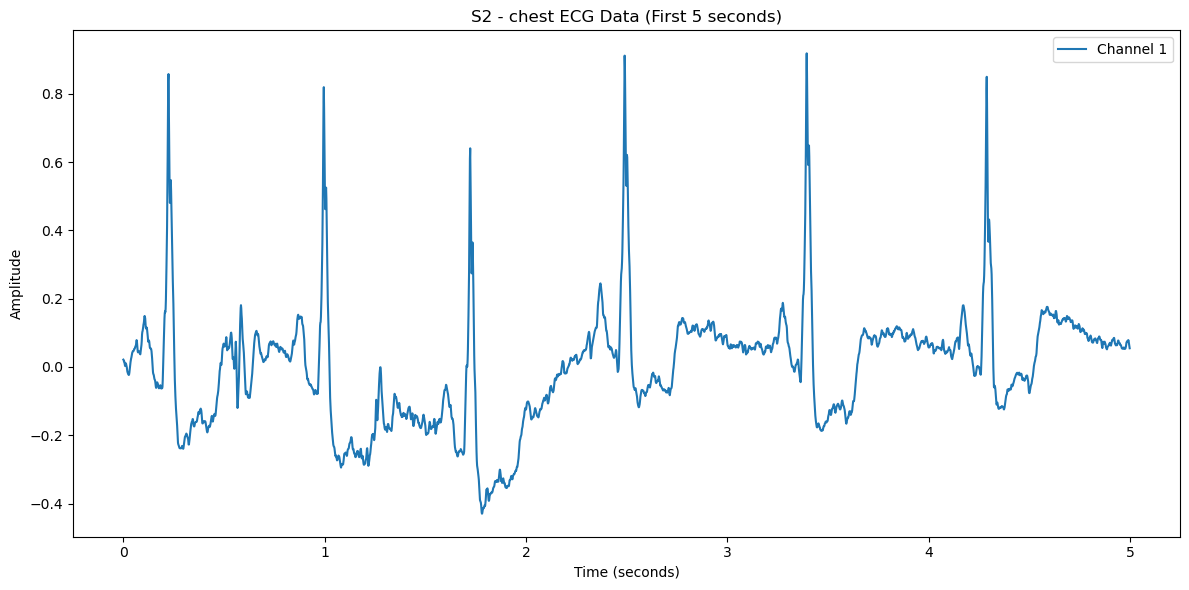

EMG shape: (4255300, 1), size: 32.47 MB


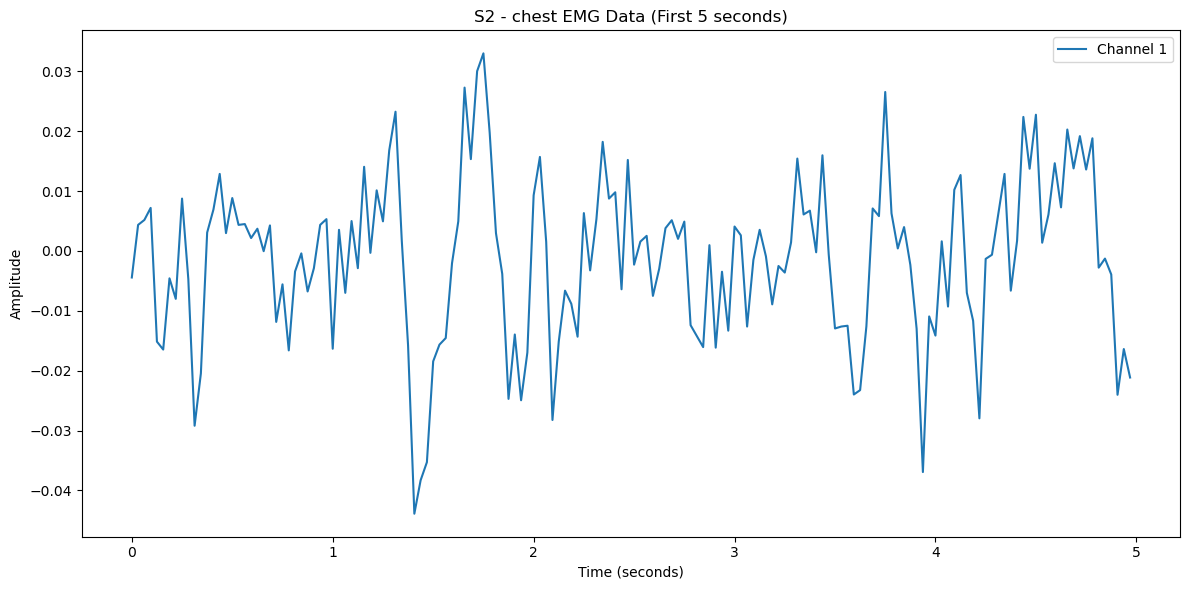

EDA shape: (4255300, 1), size: 32.47 MB


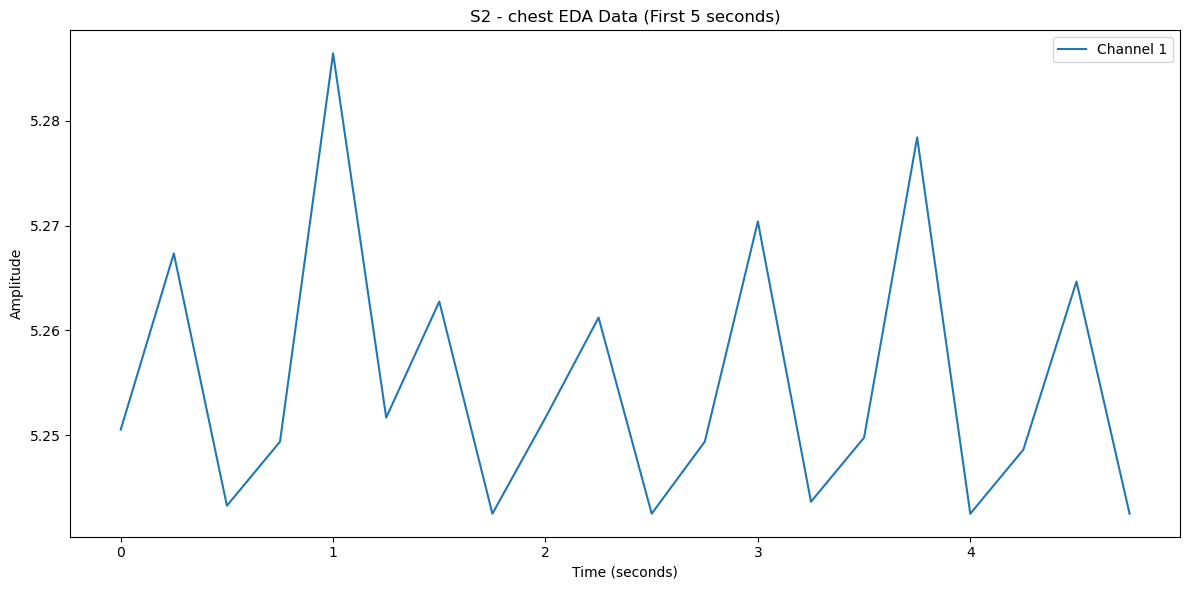

Temp shape: (4255300, 1), size: 16.23 MB


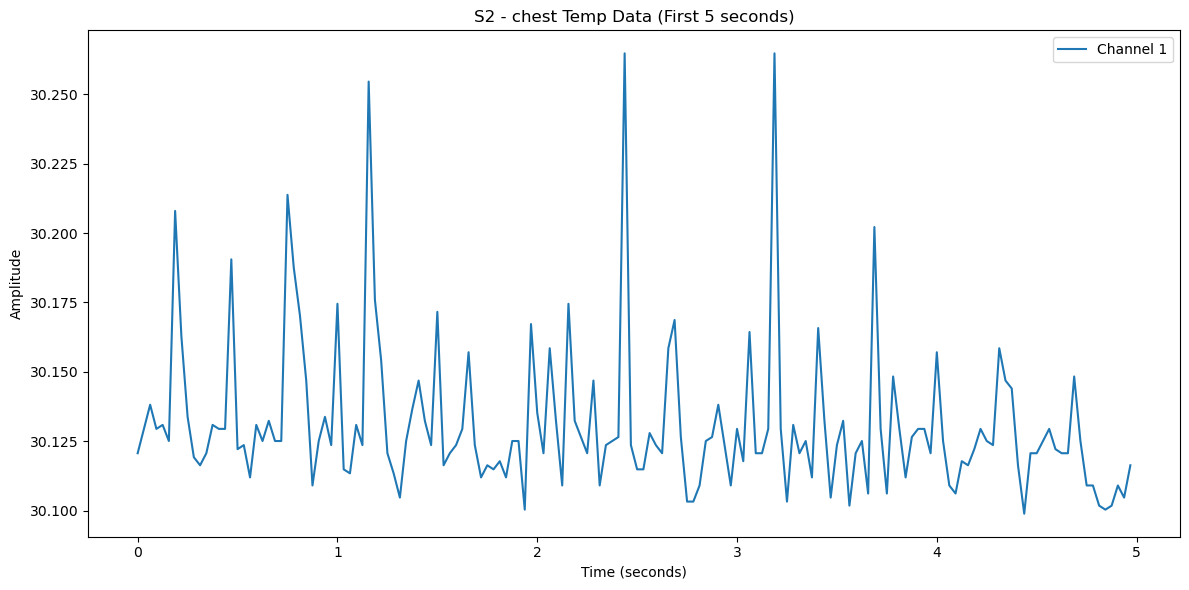

Resp shape: (4255300, 1), size: 32.47 MB


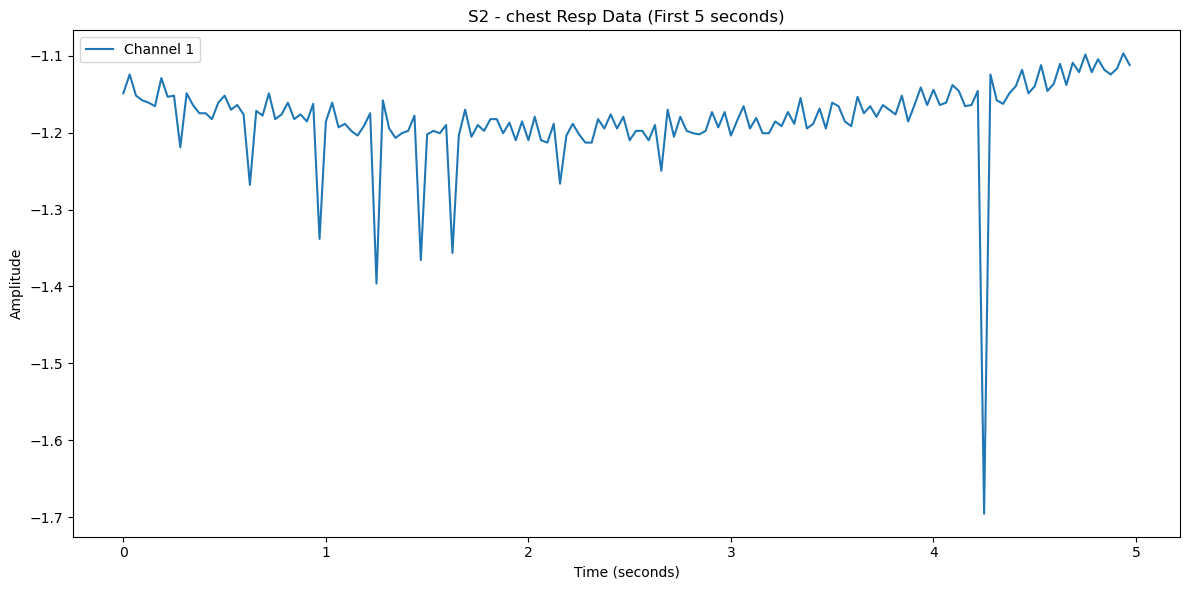


Exploring wrist sensors:
ACC shape: (194528, 3), size: 4.45 MB


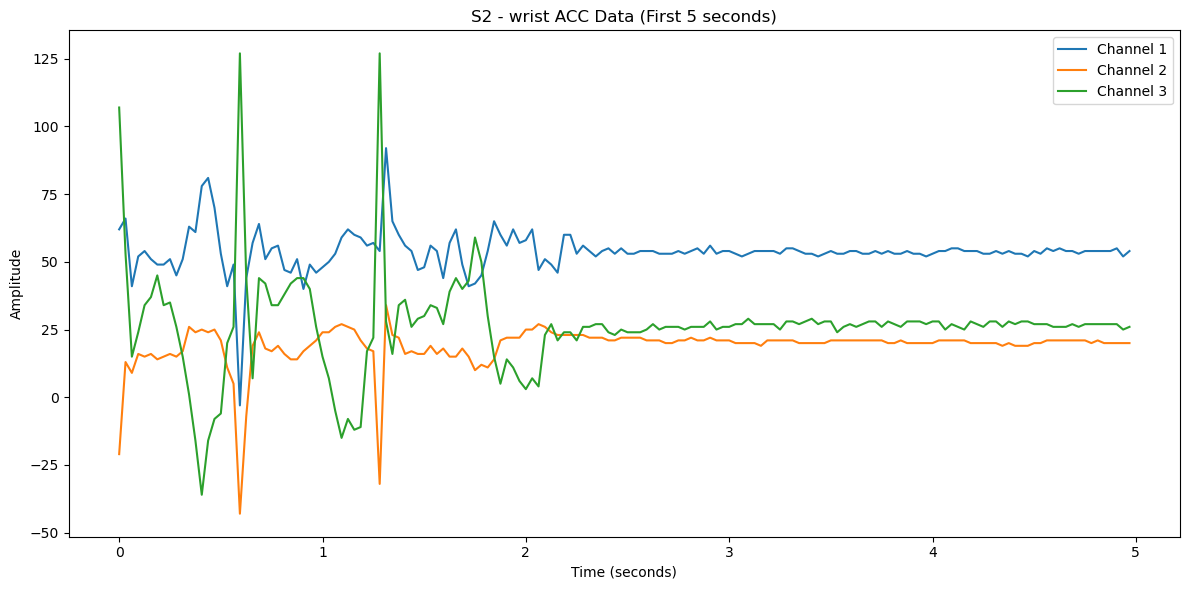

BVP shape: (389056, 1), size: 2.97 MB


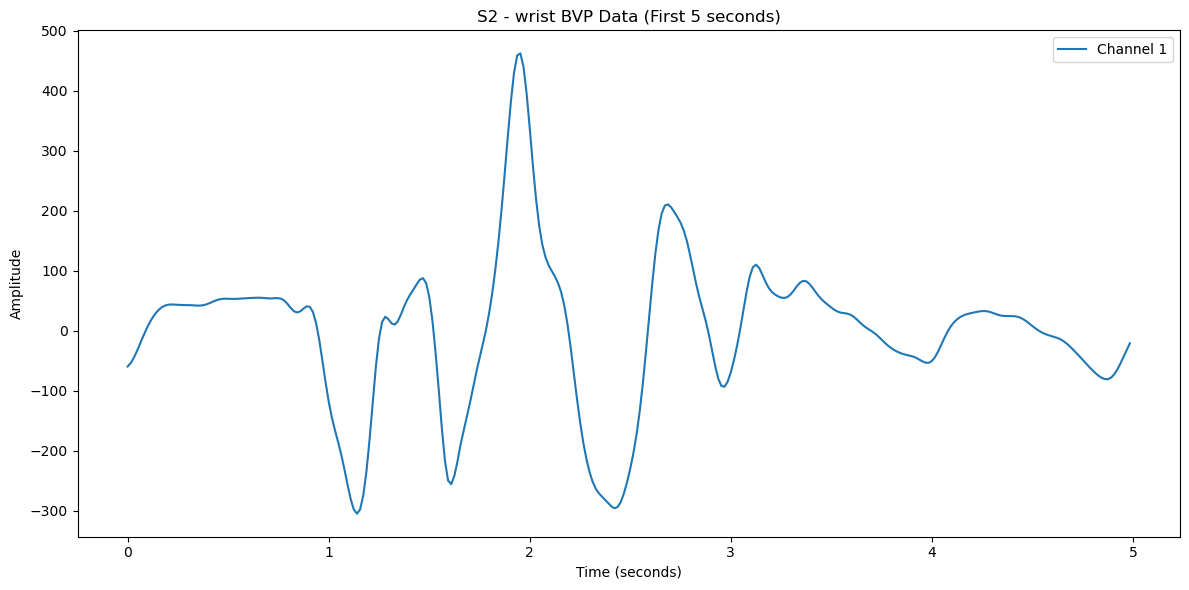

EDA shape: (24316, 1), size: 0.19 MB


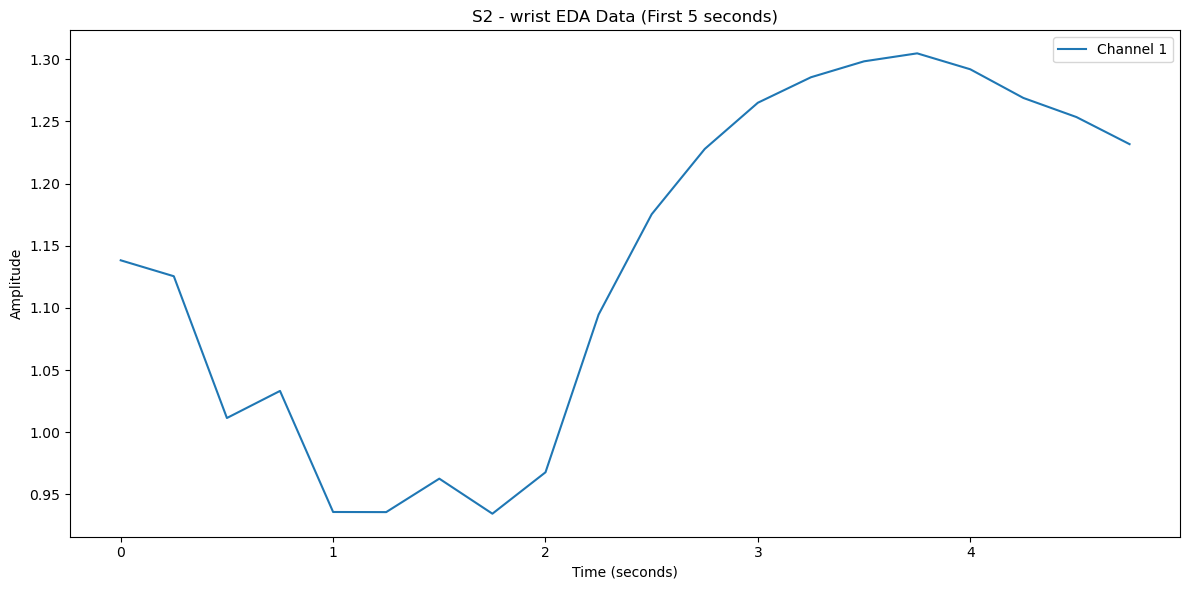

TEMP shape: (24316, 1), size: 0.19 MB


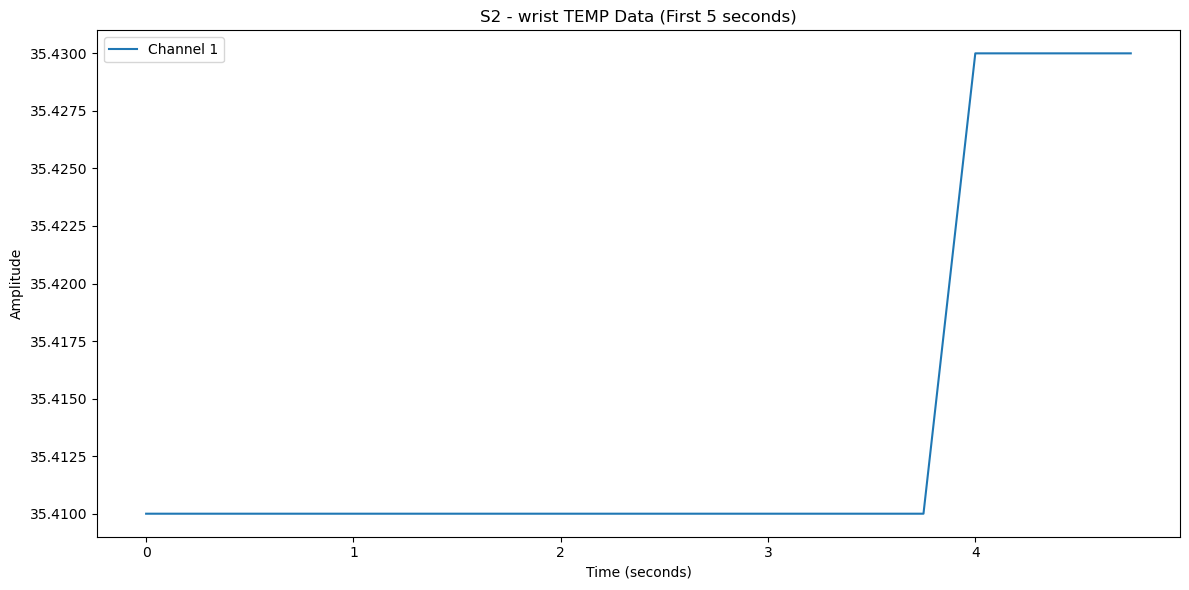

In [21]:
# Plot a sample of sensor data if available
if data and isinstance(data, dict) and 'signal' in data:
    # Check for different sensor locations
    for location in data['signal'].keys():
        print(f"\nExploring {location} sensors:")
        
        # Check for different sensor types
        for sensor_type in data['signal'][location].keys():
            sensor_data = data['signal'][location][sensor_type]
            
            if isinstance(sensor_data, np.ndarray):
                print(f"{sensor_type} shape: {sensor_data.shape}, size: {sensor_data.nbytes / (1024 * 1024):.2f} MB")
                
                # Plot a sample of the data (first 5 seconds worth of data)
                if sensor_data.ndim >= 2:
                    # Determine sample rate (for display purposes)
                    # WESAD typically uses 700 Hz for ECG, 32 Hz for ACC, etc.
                    sample_rates = {
                        'ACC': 32,  # 32 Hz for accelerometer
                        'BVP': 64,  # 64 Hz for blood volume pulse
                        'EDA': 4,   # 4 Hz for electrodermal activity
                        'TEMP': 4,  # 4 Hz for temperature
                        'ECG': 700  # 700 Hz for ECG
                    }
                    sample_rate = sample_rates.get(sensor_type, 32)  # Default to 32 Hz
                    
                    # Calculate how many samples for 5 seconds
                    sample_count = min(5 * sample_rate, sensor_data.shape[0])
                    
                    plt.figure(figsize=(12, 6))
                    time = np.arange(sample_count) / sample_rate
                    
                    for i in range(min(3, sensor_data.shape[1])):
                        plt.plot(time, sensor_data[:sample_count, i], label=f'Channel {i+1}')
                    
                    plt.title(f"{subject_id} - {location} {sensor_type} Data (First 5 seconds)")
                    plt.xlabel("Time (seconds)")
                    plt.ylabel("Amplitude")
                    plt.legend()
                    plt.tight_layout()
                    plt.show()

Loading S10...
Successfully loaded with latin1 encoding
Loading S11...
Successfully loaded with latin1 encoding
Loading S13...
Successfully loaded with latin1 encoding


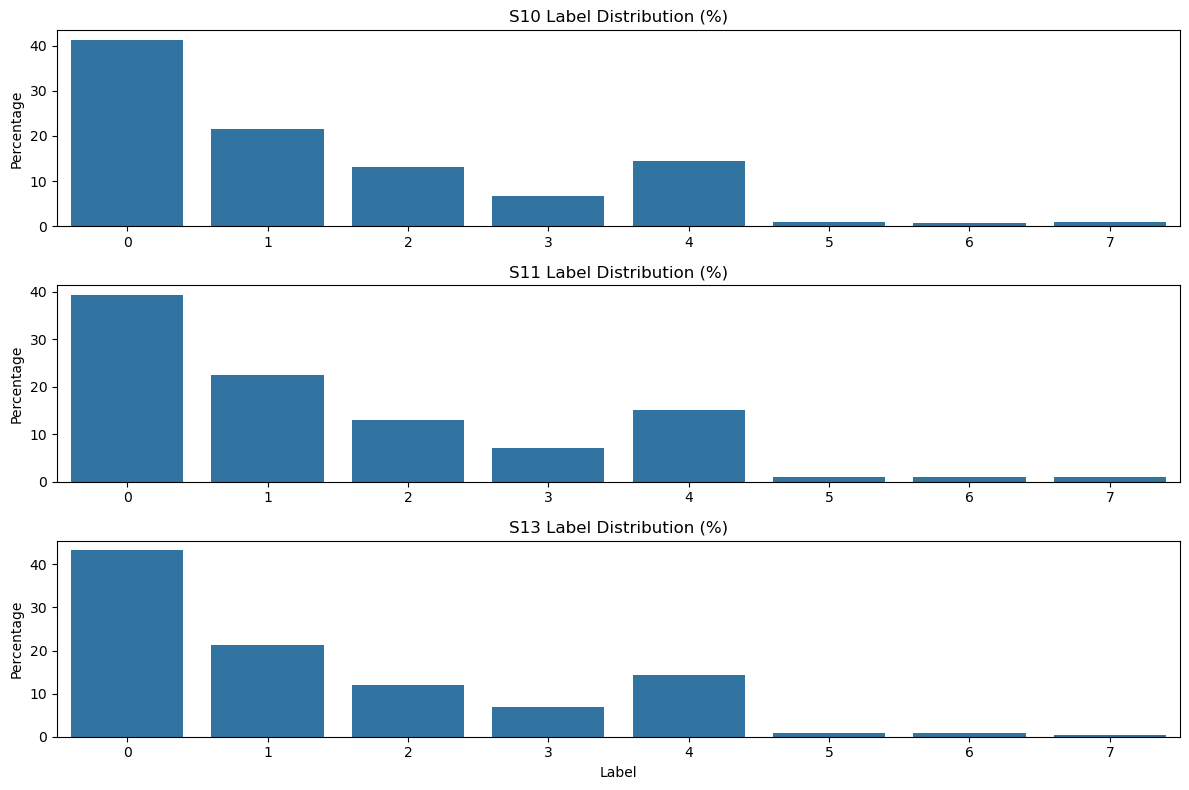


Sensor data sizes across subjects:
   Subject Location Sensor  Size (MB)         Shape
0      S10    chest    ACC  88.055420  (3847200, 3)
1      S10    chest    ECG  29.351807  (3847200, 1)
2      S10    chest    EMG  29.351807  (3847200, 1)
3      S10    chest    EDA  29.351807  (3847200, 1)
4      S10    chest   Temp  14.675903  (3847200, 1)
5      S10    chest   Resp  29.351807  (3847200, 1)
6      S10    wrist    ACC   4.025391   (175872, 3)
7      S10    wrist    BVP   2.683594   (351744, 1)
8      S10    wrist    EDA   0.167725    (21984, 1)
9      S10    wrist   TEMP   0.167725    (21984, 1)
10     S11    chest    ACC  83.841705  (3663100, 3)
11     S11    chest    ECG  27.947235  (3663100, 1)
12     S11    chest    EMG  27.947235  (3663100, 1)
13     S11    chest    EDA  27.947235  (3663100, 1)
14     S11    chest   Temp  13.973618  (3663100, 1)
15     S11    chest   Resp  27.947235  (3663100, 1)
16     S11    wrist    ACC   3.832764   (167456, 3)
17     S11    wrist    BVP  

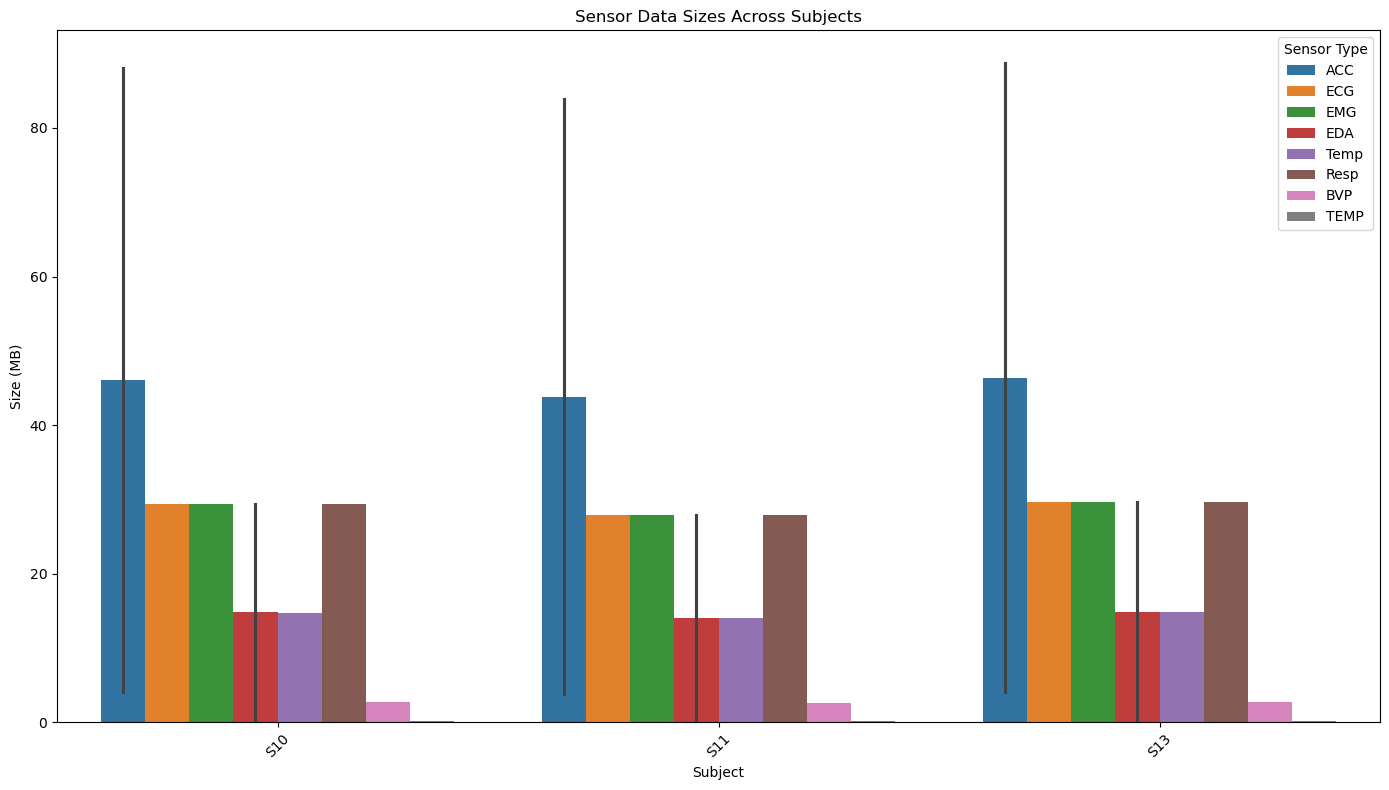

In [22]:
# Function to compare multiple subjects
def compare_subjects(subject_ids, max_subjects=5):
    # Limit the number of subjects to avoid too many plots
    subject_ids = subject_ids[:max_subjects]
    
    all_subject_data = {}
    for subject_id in subject_ids:
        for subj, path in subjects:
            if subj == subject_id:
                print(f"Loading {subject_id}...")
                data = load_pickle_file(path)
                if data:
                    all_subject_data[subject_id] = data
                break
    
    if not all_subject_data:
        print("No subjects were successfully loaded")
        return
    
    # Compare label distributions
    plt.figure(figsize=(12, 8))
    
    for i, (subject_id, data) in enumerate(all_subject_data.items()):
        if isinstance(data, dict) and 'label' in data:
            labels = data['label']
            unique_labels, counts = np.unique(labels, return_counts=True)
            percentages = counts / len(labels) * 100
            
            plt.subplot(len(all_subject_data), 1, i+1)
            sns.barplot(x=[str(l) for l in unique_labels], y=percentages)
            plt.title(f"{subject_id} Label Distribution (%)")
            plt.ylabel("Percentage")
            if i == len(all_subject_data) - 1:
                plt.xlabel("Label")
    
    plt.tight_layout()
    plt.show()
    
    # Compare data sizes
    size_data = []
    for subject_id, data in all_subject_data.items():
        if isinstance(data, dict) and 'signal' in data:
            for location in data['signal'].keys():
                for sensor_type in data['signal'][location].keys():
                    sensor_data = data['signal'][location][sensor_type]
                    if isinstance(sensor_data, np.ndarray):
                        size_data.append({
                            'Subject': subject_id,
                            'Location': location,
                            'Sensor': sensor_type,
                            'Size (MB)': sensor_data.nbytes / (1024 * 1024),
                            'Shape': str(sensor_data.shape)
                        })
    
    if size_data:
        size_df = pd.DataFrame(size_data)
        print("\nSensor data sizes across subjects:")
        print(size_df)
        
        # Plot the sizes
        plt.figure(figsize=(14, 8))
        sns.barplot(x='Subject', y='Size (MB)', hue='Sensor', data=size_df)
        plt.title("Sensor Data Sizes Across Subjects")
        plt.ylabel("Size (MB)")
        plt.xticks(rotation=45)
        plt.legend(title="Sensor Type")
        plt.tight_layout()
        plt.show()

# Compare the first 3 subjects
first_3_subjects = [s[0] for s in subjects[:3]]
compare_subjects(first_3_subjects)

In [23]:
# Function to create a summary of the dataset
def create_dataset_summary():
    summary = {
        'total_subjects': len(subjects),
        'subject_ids': [s[0] for s in subjects],
        'available_signals': set(),
        'available_locations': set(),
        'label_ranges': {},
    }
    
    # Sample a few subjects to understand the structure
    sample_subjects = [s[0] for s in subjects[:min(5, len(subjects))]]
    
    for subject_id in sample_subjects:
        for subj, path in subjects:
            if subj == subject_id:
                data = load_pickle_file(path)
                if data and isinstance(data, dict):
                    # Record signal types and locations
                    if 'signal' in data:
                        for location in data['signal'].keys():
                            summary['available_locations'].add(location)
                            for sensor in data['signal'][location].keys():
                                summary['available_signals'].add(sensor)
                    
                    # Record label information
                    if 'label' in data:
                        labels = data['label']
                        unique_labels = np.unique(labels)
                        summary['label_ranges'][subject_id] = (
                            int(np.min(unique_labels)), 
                            int(np.max(unique_labels))
                        )
    
    # Convert sets to lists for display
    summary['available_signals'] = sorted(list(summary['available_signals']))
    summary['available_locations'] = sorted(list(summary['available_locations']))
    
    print("\n=== WESAD DATASET SUMMARY ===")
    print(f"Total subjects: {summary['total_subjects']}")
    print(f"Subject IDs: {summary['subject_ids']}")
    print(f"Available sensor locations: {summary['available_locations']}")
    print(f"Available signals: {summary['available_signals']}")
    print(f"Label ranges (sampled subjects): {summary['label_ranges']}")
    
    return summary

# Create dataset summary
dataset_summary = create_dataset_summary()


Successfully loaded with latin1 encoding
Successfully loaded with latin1 encoding
Successfully loaded with latin1 encoding
Successfully loaded with latin1 encoding
Successfully loaded with latin1 encoding

=== WESAD DATASET SUMMARY ===
Total subjects: 15
Subject IDs: ['S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
Available sensor locations: ['chest', 'wrist']
Available signals: ['ACC', 'BVP', 'ECG', 'EDA', 'EMG', 'Resp', 'TEMP', 'Temp']
Label ranges (sampled subjects): {'S10': (0, 7), 'S11': (0, 7), 'S13': (0, 7), 'S14': (0, 7), 'S15': (0, 7)}


/var/folders/b1/bqgk87r94m315md9p257d6s40000gn/T/ipykernel_29893/192843571.py:70: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=True, color='#f0f0f0',


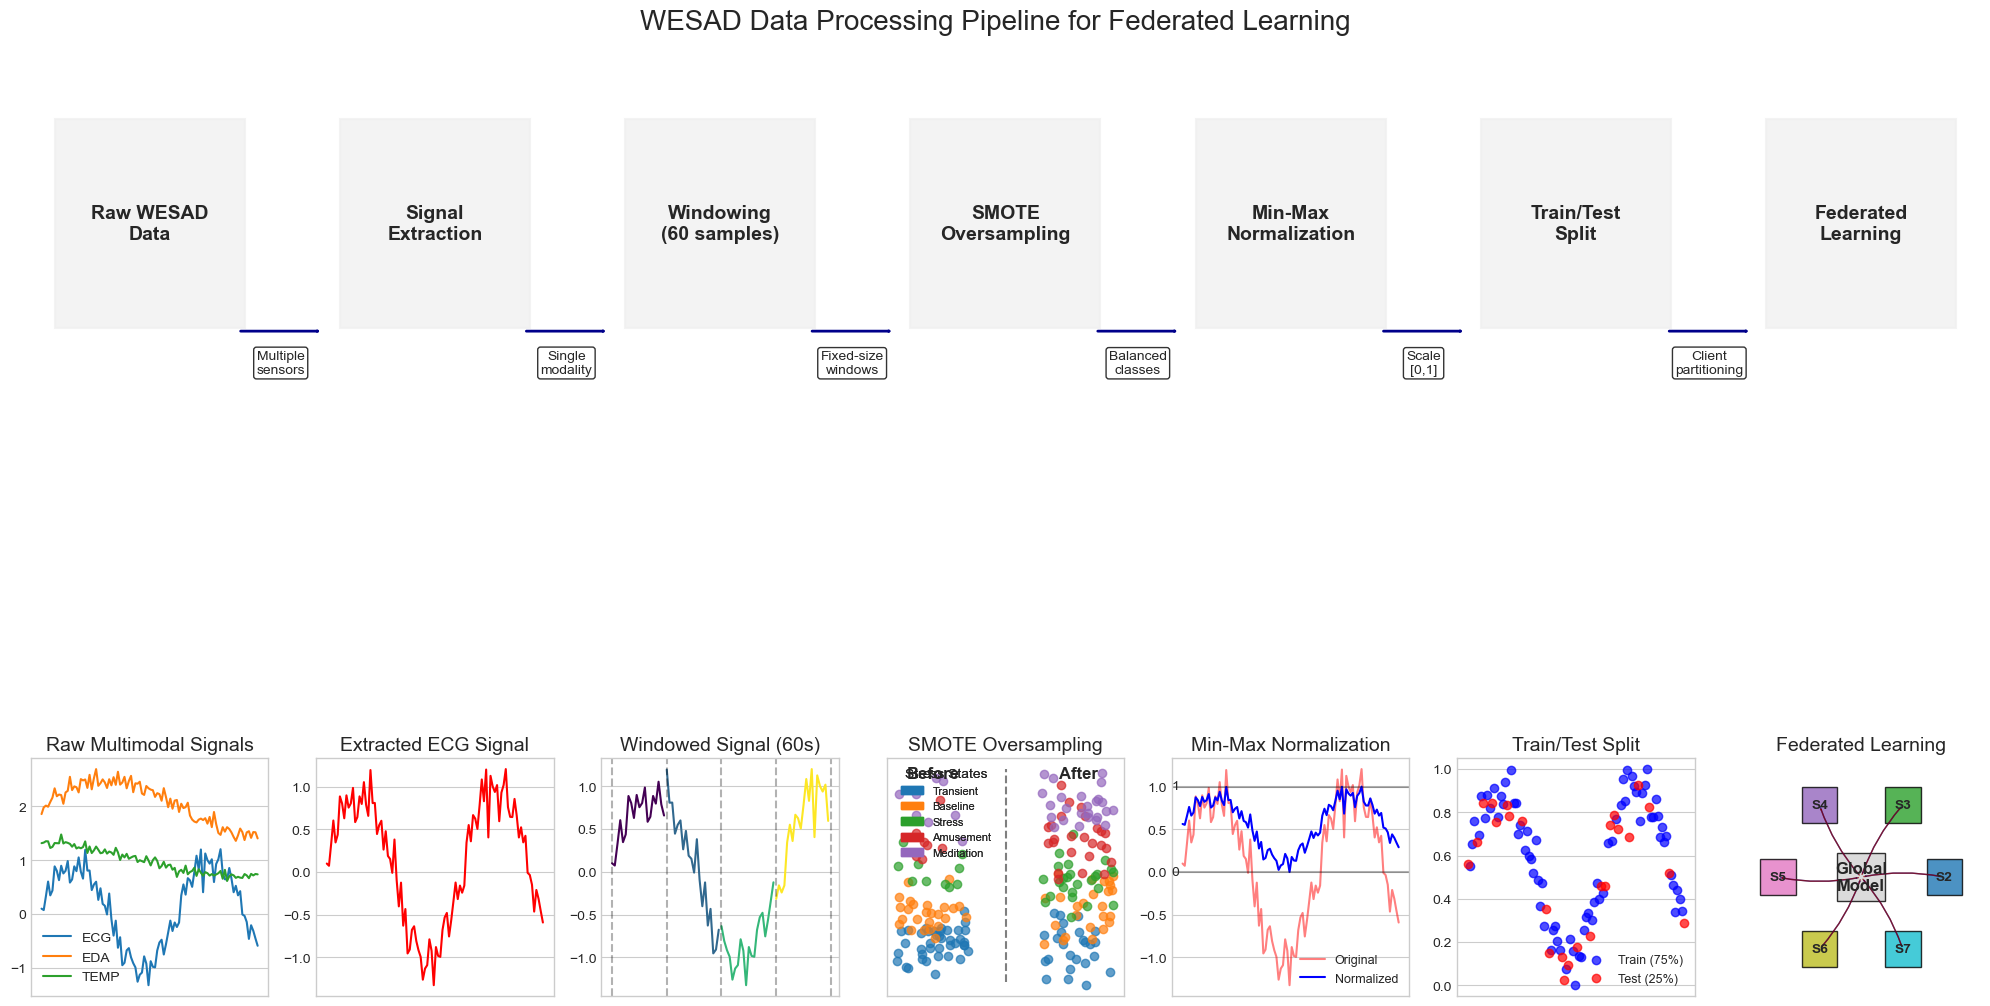

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch, Rectangle
import matplotlib.patches as mpatches

# Create the figure - ADJUSTED: Changed aspect ratio for more square boxes
fig = plt.figure(figsize=(20, 14))  # Increased height relative to width

# Define the main processing steps
steps = ['Raw WESAD\nData', 'Signal\nExtraction', 'Windowing\n(60 samples)', 
         'SMOTE\nOversampling', 'Min-Max\nNormalization', 'Train/Test\nSplit', 'Federated\nLearning']

# Create sample data visualizations
np.random.seed(42)
x = np.linspace(0, 10, 100)

# Raw data - multiple biosignals
raw_ecg = np.sin(x) + np.random.normal(0, 0.2, 100)
raw_eda = 0.5 * np.sin(x/2) + np.random.normal(0, 0.1, 100) + 2
raw_temp = 0.3 * np.cos(x/3) + np.random.normal(0, 0.05, 100) + 1

# Extracted signal
extracted_signal = raw_ecg.copy()

# Windowed signal
window_size = 20
windowed_signal = [extracted_signal[i:i+window_size] for i in range(0, 80, window_size)]

# Imbalanced classes for SMOTE illustration - Create 5 classes to match WESAD
# Class labels: 0 (transient), 1 (baseline), 2 (stress), 3 (amusement), 4 (meditation)
class_labels = {0: "Transient", 1: "Baseline", 2: "Stress", 3: "Amusement", 4: "Meditation"}

# Before oversampling - imbalanced data
before_samples = {
    0: np.random.normal(0.2, 0.1, 40),  # Transient - lots of samples
    1: np.random.normal(0.4, 0.1, 25),  # Baseline - medium samples
    2: np.random.normal(0.6, 0.1, 10),  # Stress - few samples
    3: np.random.normal(0.8, 0.1, 7),   # Amusement - very few samples
    4: np.random.normal(1.0, 0.1, 8)    # Meditation - very few samples
}

# After oversampling - balanced data
after_samples = {
    0: np.random.normal(0.2, 0.1, 25),  # Reduced majority classes
    1: np.random.normal(0.4, 0.1, 25),  # Kept the same
    2: np.random.normal(0.6, 0.1, 25),  # Oversampled minority
    3: np.random.normal(0.8, 0.1, 25),  # Oversampled minority
    4: np.random.normal(1.0, 0.1, 25)   # Oversampled minority
}

# Normalization
signal_min, signal_max = extracted_signal.min(), extracted_signal.max()
normalized_signal = (extracted_signal - signal_min) / (signal_max - signal_min)

# Train/test split data - Changed to 75/25 to match text
train_size = int(0.75 * len(normalized_signal))
train_indices = np.random.choice(len(normalized_signal), train_size, replace=False)
test_indices = np.array([i for i in range(len(normalized_signal)) if i not in train_indices])
train_data = normalized_signal[train_indices]
test_data = normalized_signal[test_indices]

# ADJUSTED: Create a GridSpec for better control of subplot sizes
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, len(steps), height_ratios=[1, 3], figure=fig)

# Plot top row - ADJUSTED: Make text boxes more square
for i, step in enumerate(steps):
    ax = fig.add_subplot(gs[0, i])
    # Make boxes square and more prominent
    rect = plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=True, color='#f0f0f0', 
                         edgecolor='black', linewidth=1.5, alpha=0.8)
    ax.add_patch(rect)
    plt.text(0.5, 0.5, step, ha='center', va='center', fontsize=14, fontweight='bold')
    plt.axis('off')

# Plot bottom row visuals - ADJUSTED: More square layout
# Raw data plot
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(raw_ecg, label='ECG')
ax1.plot(raw_eda, label='EDA')
ax1.plot(raw_temp, label='TEMP')
ax1.set_title('Raw Multimodal Signals', fontsize=14)
ax1.legend(fontsize=10)
ax1.set_xticks([])
# Make plot more square
ax1.set_box_aspect(1)

# Extracted signal
ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(extracted_signal, 'r-')
ax2.set_title('Extracted ECG Signal', fontsize=14)
ax2.set_xticks([])
ax2.set_box_aspect(1)

# Windowed signal
ax3 = fig.add_subplot(gs[1, 2])
colors = plt.cm.viridis(np.linspace(0, 1, len(windowed_signal)))
for j, window in enumerate(windowed_signal):
    ax3.plot(np.arange(j*window_size, (j+1)*window_size), window, color=colors[j])
    # Add window boundaries
    ax3.axvline(x=j*window_size, color='k', linestyle='--', alpha=0.3)
ax3.axvline(x=len(windowed_signal)*window_size, color='k', linestyle='--', alpha=0.3)
ax3.set_title('Windowed Signal (60s)', fontsize=14)
ax3.set_xticks([])
ax3.set_box_aspect(1)

# SMOTE Oversampling
ax4 = fig.add_subplot(gs[1, 3])
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Distinct colors for each class

# Before - left side
x_before = 0.3
for i, (class_id, samples) in enumerate(before_samples.items()):
    y_jitter = np.random.uniform(-0.05, 0.05, len(samples))
    ax4.scatter(
        np.random.uniform(x_before-0.1, x_before+0.1, len(samples)), 
        samples + y_jitter, 
        color=class_colors[i], 
        alpha=0.7, 
        label=f"{class_labels[class_id]} ({len(samples)})"
    )

# After - right side
x_after = 0.7
for i, (class_id, samples) in enumerate(after_samples.items()):
    y_jitter = np.random.uniform(-0.05, 0.05, len(samples))
    ax4.scatter(
        np.random.uniform(x_after-0.1, x_after+0.1, len(samples)), 
        samples + y_jitter, 
        color=class_colors[i], 
        alpha=0.7
    )

ax4.plot([0.5, 0.5], [0, 1.2], 'k--', alpha=0.5)
ax4.text(x_before, 1.15, 'Before', ha='center', fontsize=12, fontweight='bold')
ax4.text(x_after, 1.15, 'After', ha='center', fontsize=12, fontweight='bold')
ax4.set_title('SMOTE Oversampling', fontsize=14)

# Create a custom legend with class names - ADJUSTED: More compact legend
class_patches = []
for i, class_name in class_labels.items():
    class_patch = mpatches.Patch(color=class_colors[i], label=class_name)
    class_patches.append(class_patch)

legend1 = ax4.legend(handles=class_patches, title="Stress States", 
                  loc='upper left', bbox_to_anchor=(0.02, 1.0), fontsize=8)
ax4.add_artist(legend1)

ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_box_aspect(1)

# Normalization
ax5 = fig.add_subplot(gs[1, 4])
ax5.plot(extracted_signal, 'r-', alpha=0.5, label='Original')
ax5.plot(normalized_signal, 'b-', label='Normalized')
# Add scale indicators
ax5.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax5.axhline(y=1, color='k', linestyle='-', alpha=0.3)
ax5.text(-5, 0, '0', va='center', fontsize=10)
ax5.text(-5, 1, '1', va='center', fontsize=10)
ax5.set_title('Min-Max Normalization', fontsize=14)
ax5.legend(fontsize=9)
ax5.set_xticks([])
ax5.set_box_aspect(1)

# Train/Test Split
ax6 = fig.add_subplot(gs[1, 5])
ax6.scatter(train_indices, train_data, color='blue', alpha=0.7, label='Train (75%)')
ax6.scatter(test_indices, test_data, color='red', alpha=0.7, label='Test (25%)')
ax6.set_title('Train/Test Split', fontsize=14)
ax6.legend(fontsize=9)
ax6.set_xticks([])
ax6.set_box_aspect(1)

# Add Federated Learning visualization
ax7 = fig.add_subplot(gs[1, 6])
ax7.axis('off')
ax7.set_box_aspect(1)

# Create a simple federated learning diagram
# Central server
server_center = [0.5, 0.5]
server_size = 0.2
server = plt.Rectangle((server_center[0]-server_size/2, server_center[1]-server_size/2), 
                     server_size, server_size, 
                     facecolor='lightgray', edgecolor='black', 
                     alpha=0.8, zorder=1)
ax7.add_patch(server)
ax7.text(server_center[0], server_center[1], "Global\nModel", 
       ha='center', va='center', fontsize=12, fontweight='bold')

# Client devices in a circle around the server
n_clients = 6
client_size = 0.15
radius = 0.35
client_colors = plt.cm.tab10(np.linspace(0, 1, n_clients))

for i in range(n_clients):
    angle = 2 * np.pi * i / n_clients
    client_x = server_center[0] + radius * np.cos(angle)
    client_y = server_center[1] + radius * np.sin(angle)
    
    client = plt.Rectangle((client_x-client_size/2, client_y-client_size/2), 
                        client_size, client_size, 
                        facecolor=client_colors[i], edgecolor='black', 
                        alpha=0.8, zorder=1)
    ax7.add_patch(client)
    ax7.text(client_x, client_y, f"S{i+2}", 
           ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Add arrows to/from server
    arrow_to = FancyArrowPatch((client_x, client_y), (server_center[0], server_center[1]),
                            arrowstyle='->', color='darkblue', linewidth=1,
                            connectionstyle='arc3,rad=0.1', alpha=0.7)
    arrow_from = FancyArrowPatch((server_center[0], server_center[1]), (client_x, client_y),
                              arrowstyle='->', color='darkred', linewidth=1,
                              connectionstyle='arc3,rad=-0.1', alpha=0.7)
    ax7.add_patch(arrow_to)
    ax7.add_patch(arrow_from)

ax7.set_title('Federated Learning', fontsize=14)

# ADJUSTED: Move flow text labels closer to the arrows
num_steps = len(steps)
arrow_y = 0.75  # Higher position for arrows

# ADJUSTED: Simplified and more compact flow annotation
for i in range(num_steps - 1):
    start_x = (i + 0.85) / num_steps  # Adjusted for positioning
    end_x = (i + 1.15) / num_steps
    arrow = FancyArrowPatch(
        (start_x, arrow_y), (end_x, arrow_y),
        transform=fig.transFigure, figure=fig,
        arrowstyle='->', color='darkblue', linewidth=2
    )
    fig.patches.append(arrow)

    flow_text = ["Multiple\nsensors", "Single\nmodality", "Fixed-size\nwindows",
               "Balanced\nclasses", "Scale\n[0,1]", "Client\npartitioning"]

    if i < len(flow_text):
        # ADJUSTED: Moved labels closer to arrows and made them more compact
        plt.figtext((i + 1) / num_steps, 0.72, flow_text[i], ha='center', fontsize=10,
                  bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2'))

# ADJUSTED: Better layout with less dead space
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, wspace=0.2, hspace=0.25)
plt.suptitle('WESAD Data Processing Pipeline for Federated Learning', fontsize=20, y=0.98)

# Save the figure with a higher resolution
plt.savefig('wesad_federated_pipeline_improved.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch, Rectangle
import matplotlib.patches as mpatches
import matplotlib as mpl

# Improve visual style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

# Create a larger figure with more square subplots
# Increase height to make the overall aspect ratio more balanced
fig = plt.figure(figsize=(20, 16))

# Define the main processing steps
steps = ['Raw WESAD\nData', 'Signal\nExtraction', 'Windowing\n(60 samples)', 
         'SMOTE\nOversampling', 'Min-Max\nNormalization', 'Train/Test\nSplit', 'Federated\nLearning']

# Create sample data visualizations
np.random.seed(42)
x = np.linspace(0, 10, 100)

# Raw data - multiple biosignals
raw_ecg = np.sin(x) + np.random.normal(0, 0.2, 100)
raw_eda = 0.5 * np.sin(x/2) + np.random.normal(0, 0.1, 100) + 2
raw_temp = 0.3 * np.cos(x/3) + np.random.normal(0, 0.05, 100) + 1

# Extracted signal
extracted_signal = raw_ecg.copy()

# Windowed signal
window_size = 20
windowed_signal = [extracted_signal[i:i+window_size] for i in range(0, 80, window_size)]

# Imbalanced classes for SMOTE illustration - Create 5 classes to match WESAD
# Class labels: 0 (transient), 1 (baseline), 2 (stress), 3 (amusement), 4 (meditation)
class_labels = {0: "Transient", 1: "Baseline", 2: "Stress", 3: "Amusement", 4: "Meditation"}

# Before oversampling - imbalanced data
before_samples = {
    0: np.random.normal(0.2, 0.1, 40),  # Transient - lots of samples
    1: np.random.normal(0.4, 0.1, 25),  # Baseline - medium samples
    2: np.random.normal(0.6, 0.1, 10),  # Stress - few samples
    3: np.random.normal(0.8, 0.1, 7),   # Amusement - very few samples
    4: np.random.normal(1.0, 0.1, 8)    # Meditation - very few samples
}

# After oversampling - balanced data
after_samples = {
    0: np.random.normal(0.2, 0.1, 25),  # Reduced majority classes
    1: np.random.normal(0.4, 0.1, 25),  # Kept the same
    2: np.random.normal(0.6, 0.1, 25),  # Oversampled minority
    3: np.random.normal(0.8, 0.1, 25),  # Oversampled minority
    4: np.random.normal(1.0, 0.1, 25)   # Oversampled minority
}

# Normalization
signal_min, signal_max = extracted_signal.min(), extracted_signal.max()
normalized_signal = (extracted_signal - signal_min) / (signal_max - signal_min)

# Train/test split data - Changed to 75/25 to match text
train_size = int(0.75 * len(normalized_signal))
train_indices = np.random.choice(len(normalized_signal), train_size, replace=False)
test_indices = np.array([i for i in range(len(normalized_signal)) if i not in train_indices])
train_data = normalized_signal[train_indices]
test_data = normalized_signal[test_indices]

# Create custom subplot grid for more control over spacing
# This gives us more square subplot shapes
gs = fig.add_gridspec(nrows=2, ncols=7, height_ratios=[1, 3], 
                      hspace=0.4, wspace=0.4,
                      left=0.05, right=0.95, bottom=0.05, top=0.9)

# Plot top row titles with improved styling
for i, step in enumerate(steps):
    ax = fig.add_subplot(gs[0, i])
    ax.text(0.5, 0.5, step, ha='center', va='center', fontsize=18, 
            fontweight='bold', transform=ax.transAxes)
    ax.axis('off')
    
    # Add a subtle box around each step title
    rect = Rectangle((0.1, 0.1), 0.8, 0.8, 
                     facecolor='lightgray', edgecolor='darkgray', 
                     alpha=0.3, transform=ax.transAxes)
    ax.add_patch(rect)

# Plot bottom row visuals with improved styling
# Raw signals
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(raw_ecg, label='ECG', linewidth=2)
ax1.plot(raw_eda, label='EDA', linewidth=2)
ax1.plot(raw_temp, label='TEMP', linewidth=2)
ax1.set_title('Raw Multimodal Signals', fontsize=16, fontweight='bold', pad=15)
ax1.legend(fontsize=14, loc='best', frameon=True, framealpha=0.9)
ax1.set_xticks([])
ax1.set_ylim(-1.5, 2.7)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('auto')

# Extracted signal
ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(extracted_signal, 'r-', linewidth=2.5)
ax2.set_title('Extracted ECG Signal', fontsize=16, fontweight='bold', pad=15)
ax2.set_xticks([])
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-1.3, 1.3)
ax2.set_aspect('auto')

# Windowed signal
ax3 = fig.add_subplot(gs[1, 2])
colors = plt.cm.viridis(np.linspace(0, 1, len(windowed_signal)))
for j, window in enumerate(windowed_signal):
    ax3.plot(np.arange(j*window_size, (j+1)*window_size), window, 
             color=colors[j], linewidth=2.5)
    # Add window boundaries with improved visibility
    ax3.axvline(x=j*window_size, color='k', linestyle='--', alpha=0.4, linewidth=1.5)
ax3.axvline(x=len(windowed_signal)*window_size, color='k', linestyle='--', alpha=0.4, linewidth=1.5)
ax3.set_title('Windowed Signal (60s)', fontsize=16, fontweight='bold', pad=15)
ax3.set_xticks([])
ax3.set_ylim(-1.3, 1.3)
ax3.grid(True, alpha=0.3)
ax3.set_aspect('auto')

# SMOTE Oversampling
ax4 = fig.add_subplot(gs[1, 3])
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Distinct colors for each class

# Before - left side
x_before = 0.3
for i, (class_id, samples) in enumerate(before_samples.items()):
    y_jitter = np.random.uniform(-0.05, 0.05, len(samples))
    ax4.scatter(
        np.random.uniform(x_before-0.1, x_before+0.1, len(samples)), 
        samples + y_jitter, 
        color=class_colors[i], 
        alpha=0.7,
        s=80,  # Increased marker size
        edgecolors='k',  # Add black edge
        linewidths=0.5,
        label=f"{class_labels[class_id]} ({len(samples)})"
    )

# After - right side
x_after = 0.7
for i, (class_id, samples) in enumerate(after_samples.items()):
    y_jitter = np.random.uniform(-0.05, 0.05, len(samples))
    ax4.scatter(
        np.random.uniform(x_after-0.1, x_after+0.1, len(samples)), 
        samples + y_jitter, 
        color=class_colors[i], 
        alpha=0.7,
        s=80,  # Increased marker size
        edgecolors='k',  # Add black edge
        linewidths=0.5
    )

ax4.plot([0.5, 0.5], [0, 1.2], 'k--', alpha=0.5, linewidth=2)
ax4.text(x_before, 1.15, 'Before', ha='center', fontsize=14, fontweight='bold')
ax4.text(x_after, 1.15, 'After', ha='center', fontsize=14, fontweight='bold')
ax4.set_title('SMOTE Oversampling', fontsize=16, fontweight='bold', pad=15)

# Create a custom legend with class names
class_patches = []
for i, class_name in class_labels.items():
    class_patch = mpatches.Patch(color=class_colors[i], label=class_name)
    class_patches.append(class_patch)

legend1 = ax4.legend(handles=class_patches, title="Stress States", 
                    loc='upper left', bbox_to_anchor=(-0.1, 1.0), fontsize=12,
                    title_fontsize=14, frameon=True, framealpha=0.9)
ax4.add_artist(legend1)

ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_ylim(-0.1, 1.2)
ax4.set_aspect('auto')

# Min-Max Normalization
ax5 = fig.add_subplot(gs[1, 4])
ax5.plot(extracted_signal, 'r-', alpha=0.6, label='Original', linewidth=2.5)
ax5.plot(normalized_signal, 'b-', label='Normalized', linewidth=2.5)
# Add scale indicators
ax5.axhline(y=0, color='k', linestyle='-', alpha=0.4, linewidth=1.5)
ax5.axhline(y=1, color='k', linestyle='-', alpha=0.4, linewidth=1.5)
ax5.text(-5, 0, '0', va='center', fontsize=14, fontweight='bold')
ax5.text(-5, 1, '1', va='center', fontsize=14, fontweight='bold')
ax5.set_title('Min-Max Normalization', fontsize=16, fontweight='bold', pad=15)
ax5.legend(fontsize=14, loc='best', frameon=True, framealpha=0.9)
ax5.set_xticks([])
ax5.set_ylim(-1.3, 1.3)
ax5.grid(True, alpha=0.3)
ax5.set_aspect('auto')

# Train/Test Split
ax6 = fig.add_subplot(gs[1, 5])
ax6.scatter(train_indices, train_data, color='blue', alpha=0.7, 
           label='Train (75%)', s=80, edgecolors='k', linewidths=0.5)
ax6.scatter(test_indices, test_data, color='red', alpha=0.7, 
           label='Test (25%)', s=80, edgecolors='k', linewidths=0.5)
ax6.set_title('Train/Test Split', fontsize=16, fontweight='bold', pad=15)
ax6.legend(fontsize=14, loc='best', frameon=True, framealpha=0.9)
ax6.set_xticks([])
ax6.grid(True, alpha=0.3)
ax6.set_ylim(-0.1, 1.1)
ax6.set_aspect('auto')

# Federated Learning visualization
ax7 = fig.add_subplot(gs[1, 6])
ax7.axis('off')

# Create a simple federated learning diagram with improved visuals
# Central server
server_center = [0.5, 0.5]
server_size = 0.25
server = Rectangle((server_center[0]-server_size/2, server_center[1]-server_size/2), 
                   server_size, server_size, 
                   facecolor='lightgray', edgecolor='black', 
                   alpha=0.9, zorder=2, linewidth=2)
ax7.add_patch(server)
ax7.text(server_center[0], server_center[1], "Global\nModel", 
         ha='center', va='center', fontsize=14, fontweight='bold')

# Client devices in a circle around the server
n_clients = 6
client_size = 0.18
radius = 0.4
client_colors = plt.cm.tab10(np.linspace(0, 1, n_clients))

for i in range(n_clients):
    angle = 2 * np.pi * i / n_clients
    client_x = server_center[0] + radius * np.cos(angle)
    client_y = server_center[1] + radius * np.sin(angle)
    
    client = Rectangle((client_x-client_size/2, client_y-client_size/2), 
                      client_size, client_size, 
                      facecolor=client_colors[i], edgecolor='black', 
                      alpha=0.9, zorder=1, linewidth=2)
    ax7.add_patch(client)
    plt.text(client_x, client_y, f"S{i+2}", 
             ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Add arrows connecting clients to server
    arrow_to = FancyArrowPatch((client_x, client_y), 
                               (server_center[0], server_center[1]),
                               arrowstyle='simple', color='darkblue', 
                               linewidth=2, connectionstyle='arc3,rad=0.1', 
                               alpha=0.7, zorder=0)
    ax7.add_patch(arrow_to)

ax7.set_aspect('equal')  # This ensures the federated learning diagram is square

# Add arrows between steps at the top
arrow_y = 0.93  # Position for the arrows (in figure coordinates)
flow_text = ["Multiple\nsensors", "Single\nmodality", "Fixed-size\nwindows",
             "Balanced\nclasses", "Scale\n[0,1]", "Client\npartitioning"]

for i in range(len(steps) - 1):
    start_x = (i + 0.7) / len(steps)
    end_x = (i + 1.3) / len(steps)
    
    arrow = FancyArrowPatch(
        (start_x, arrow_y), (end_x, arrow_y),
        transform=fig.transFigure, figure=fig,
        arrowstyle='->', color='#1f77b4', linewidth=3,
        mutation_scale=20
    )
    fig.patches.append(arrow)

# Add the flow text boxes with improved styling
for i, text in enumerate(flow_text):
    plt.figtext((i + 1) / len(steps), arrow_y - 0.08, text, 
                ha='center', fontsize=14, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.9, 
                          boxstyle='round,pad=0.4',
                          edgecolor='#1f77b4', linewidth=2))

# Add overall title with improved styling
fig.suptitle('WESAD Data Processing Pipeline for Federated Learning', 
             fontsize=24, fontweight='bold', y=0.98)

# Save the figure with higher resolution
plt.savefig('wesad_federated_pipeline_improved.png', dpi=600, bbox_inches='tight')
plt.close()

print("Visualization successfully created with square subplots and improved clarity!")

Visualization successfully created with square subplots and improved clarity!


In [25]:
import pickle
import numpy as np
from collections import Counter

# Function to load and analyze WESAD data for each subject
def analyze_wesad_subject(subject_id):
    # Path to the pickle file (adjust as needed)
    file_path = f"dataset/WESAD/S{subject_id}/S{subject_id}.pkl"
    
    try:
        # Load the pickle file
        with open(file_path, 'rb') as file:
            data = pickle.load(file, encoding='latin1')
        
        # Get the labels (0=transient, 1=baseline, 2=stress, 3=amusement, 4=meditation)
        labels = data['label']
        
        # Count samples
        total_samples = len(labels)
        
        # Calculate class distribution
        class_counts = Counter(labels)
        total = sum(class_counts.values())
        class_distribution = {label: count/total*100 for label, count in class_counts.items()}
        
        # Determine data quality (simplified logic - you can enhance this)
        # For example, check for missing values or signal quality
        missing_values = np.isnan(data['signal']['wrist']['ACC']).sum()
        if missing_values < 100:
            quality = "High"
        elif missing_values < 1000:
            quality = "Medium"
        else:
            quality = "Low"
        
        return {
            "subject_id": f"S{subject_id}",
            "samples": total_samples,
            "class_distribution": class_distribution,
            "quality": quality
        }
    
    except Exception as e:
        print(f"Error processing subject {subject_id}: {e}")
        return None

# Analyze all subjects
subject_analyses = []
for subject_id in range(2, 18):  # Subjects S2-S17
    if subject_id != 12:  # Skip S12 as it's missing
        result = analyze_wesad_subject(subject_id)
        if result:
            subject_analyses.append(result)

# Print the results in a format for your LaTeX table
for analysis in subject_analyses:
    class_dist = [f"{analysis['class_distribution'].get(i, 0):.0f}%" for i in range(5)]
    print(f"{analysis['subject_id']} & {analysis['samples']} & [{', '.join(class_dist)}] & {analysis['quality']} \\\\")

Error processing subject 2: [Errno 2] No such file or directory: 'dataset/WESAD/S2/S2.pkl'
Error processing subject 3: [Errno 2] No such file or directory: 'dataset/WESAD/S3/S3.pkl'
Error processing subject 4: [Errno 2] No such file or directory: 'dataset/WESAD/S4/S4.pkl'
Error processing subject 5: [Errno 2] No such file or directory: 'dataset/WESAD/S5/S5.pkl'
Error processing subject 6: [Errno 2] No such file or directory: 'dataset/WESAD/S6/S6.pkl'
Error processing subject 7: [Errno 2] No such file or directory: 'dataset/WESAD/S7/S7.pkl'
Error processing subject 8: [Errno 2] No such file or directory: 'dataset/WESAD/S8/S8.pkl'
Error processing subject 9: [Errno 2] No such file or directory: 'dataset/WESAD/S9/S9.pkl'
Error processing subject 10: [Errno 2] No such file or directory: 'dataset/WESAD/S10/S10.pkl'
Error processing subject 11: [Errno 2] No such file or directory: 'dataset/WESAD/S11/S11.pkl'
Error processing subject 13: [Errno 2] No such file or directory: 'dataset/WESAD/S13